In [16]:
import pandas as pd
import json
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report

# Descargar recursos necesarios para procesamiento de texto
nltk.download('stopwords')
from nltk.corpus import stopwords

# Cargar el archivo JSON
with open('DB Completo Entrenado Manual BETO.json', 'r', encoding='utf-8') as f:
    datos_json = json.load(f)

# Extraer comentarios en un DataFrame
comentarios_data = []
for entrada in datos_json:
    for comentario in entrada['comentarios']:
        comentarios_data.append({
            'titulo': entrada['titulo'],
            'usuario': comentario['usuario'],
            'comentario': comentario['comentario'],
            'genero': comentario.get('genero', 'Indeterminado'),
            'sentimiento': comentario.get('sentimiento')
        })

comentarios_df = pd.DataFrame(comentarios_data)

# Filtrar comentarios sin sentimiento (datos no clasificados)
comentarios_no_clasificados = comentarios_df[comentarios_df['sentimiento'].isna()]

# Filtrar comentarios con sentimiento (datos clasificados)
comentarios_clasificados = comentarios_df[~comentarios_df['sentimiento'].isna()]

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Yeider\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [13]:
import nltk
from nltk.corpus import stopwords
import re

# Descargar stopwords de NLTK
nltk.download('stopwords')
nltk.download('punkt')

# Configurar stopwords adicionales
stopwords_generales = set(stopwords.words('spanish'))
stopwords_generales.update(['q', 'sins', 'sins sins'])  # Agregar stopwords personalizadas

# Preprocesar texto: convertir a minúsculas, eliminar caracteres especiales, enlaces y números
def limpiar_texto(texto):
    texto = texto.lower()  # Convertir a minúsculas
    texto = nltk.RegexpTokenizer(r'\w+').tokenize(texto)  # Tokenizar (remueve caracteres especiales)
    texto = [palabra for palabra in texto if palabra not in stopwords_generales]  # Remover stopwords
    return ' '.join(texto)

# Aplicar la función limpiar texto
comentarios_clasificados['comentario'] = comentarios_clasificados['comentario'].apply(limpiar_texto)

# Eliminar la palabra "seguir"
comentarios_clasificados['comentario'] = comentarios_clasificados['comentario'].str.replace(r'\bseguir\b', '', regex=True)



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Yeider\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Yeider\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
C:\Users\Yeider\AppData\Local\Temp\ipykernel_9268\1789366406.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  comentarios_clasificados['comentario'] = comentarios_clasificados['comentario'].apply(limpiar_texto)
C:\Users\Yeider\AppData\Local\Temp\ipykernel_9268\1789366406.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca


Palabras más comunes para el sentimiento 'Positivo':
dios: 174
mejor: 116
excelente: 105
paz: 78
siempre: 71
gran: 61
buena: 60
bien: 57
vida: 56
presentación: 52
gracias: 50
novela: 50
hermosa: 47
mujer: 47
tan: 46
actriz: 46
ser: 45
felicitaciones: 44
familia: 42
bendiga: 40

Palabras más comunes para el sentimiento 'Negativo':
si: 166
tan: 94
solo: 84
ser: 61
así: 59
gente: 56
dios: 55
noticia: 54
bien: 50
mal: 50
ver: 47
ahora: 47
hace: 44
vida: 43
nadie: 42
mas: 40
mejor: 40
va: 39
verdad: 35
sabe: 35

Palabras más comunes para el sentimiento 'Neutral':
si: 146
com: 139
https: 104
www: 82
bien: 57
caldo: 55
gallina: 52
doña: 50
pues: 42
co: 42
citytv: 40
mejor: 38
eltiempo: 38
facebook: 36
ser: 34
solo: 31
paola: 28
siempre: 24
puede: 23
ver: 21


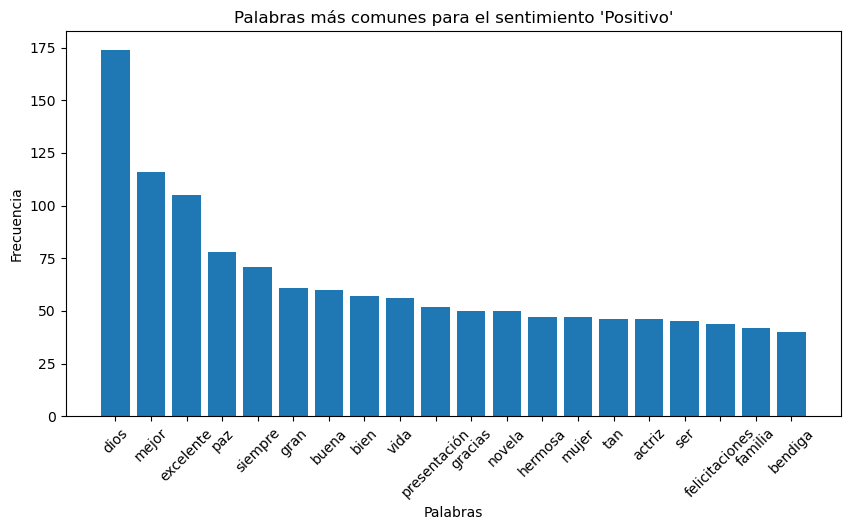

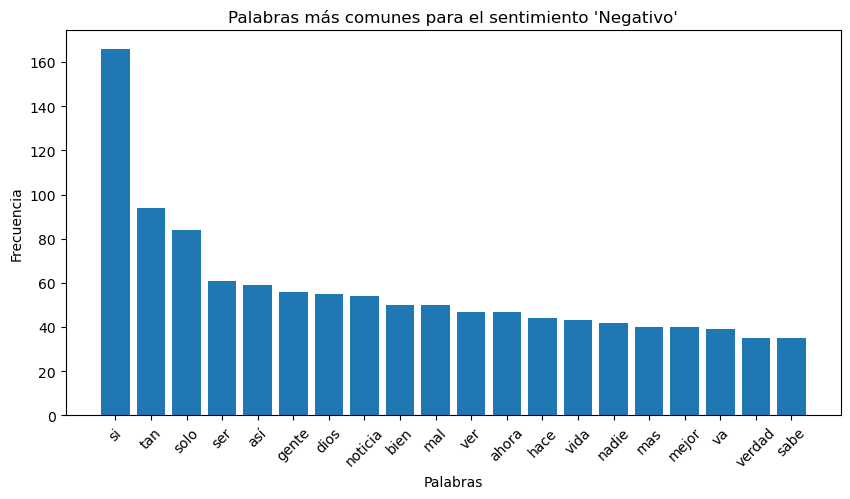

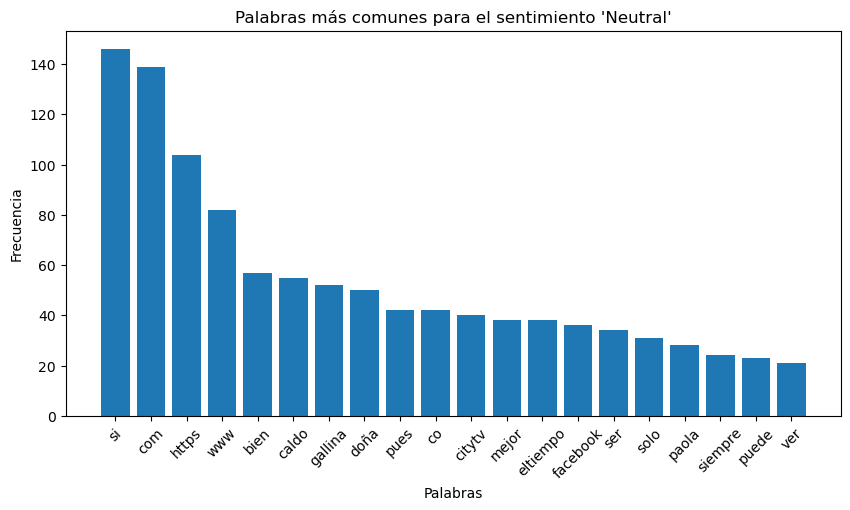

In [14]:
from collections import Counter
import matplotlib.pyplot as plt

# Función para obtener las palabras más frecuentes
def palabras_frecuentes_por_sentimiento(df, sentimiento, top_n=20):
    # Filtrar por sentimiento
    comentarios = df[df['sentimiento'] == sentimiento]['comentario']
    
    # Combinar todos los comentarios en un solo texto
    texto = " ".join(comentarios)

    # Tokenizar y contar palabras
    palabras = texto.split()
    conteo = Counter(palabras)

    # Retornar las palabras más comunes
    return conteo.most_common(top_n)

# Obtener los sentimientos únicos
sentimientos_unicos = comentarios_clasificados['sentimiento'].unique()

# Imprimir las palabras más comunes para cada sentimiento
for sentimiento in sentimientos_unicos:
    print(f"\nPalabras más comunes para el sentimiento '{sentimiento}':")
    palabras_comunes = palabras_frecuentes_por_sentimiento(comentarios_clasificados, sentimiento)
    for palabra, frecuencia in palabras_comunes:
        print(f"{palabra}: {frecuencia}")

# Opcional: Visualización de las palabras más frecuentes para un sentimiento
for sentimiento in sentimientos_unicos:
    palabras_comunes = palabras_frecuentes_por_sentimiento(comentarios_clasificados, sentimiento)
    palabras, frecuencias = zip(*palabras_comunes)

    plt.figure(figsize=(10, 5))
    plt.bar(palabras, frecuencias)
    plt.title(f"Palabras más comunes para el sentimiento '{sentimiento}'")
    plt.xlabel("Palabras")
    plt.ylabel("Frecuencia")
    plt.xticks(rotation=45)
    plt.show()


Combinaciones más comunes para el sentimiento '2':
https www: 44
citytv com: 41
com co: 41
www eltiempo: 39
eltiempo com: 39
juan pablo: 19
co https: 18
co detalles: 17
detalles https: 17
jajajaja jajajaja: 14
debe ser: 8
si puede: 7
si mejor: 6
casa famosos: 6
facebook com: 6
bien si: 6
yaneth meza: 6
ganadora paola: 5
toda dama: 5
paola gane: 5

Combinaciones más comunes para el sentimiento '0':
https www: 164
citytv com: 122
com co: 122
www eltiempo: 114
eltiempo com: 114
co https: 98
juan pablo: 60
red wi: 60
wi fi: 60
gallina caldo: 50
caldo doña: 50
doña gallina: 50
www facebook: 34
facebook com: 34
debe ser: 31
si quieres: 31
quieres saber: 30
saber contraseña: 30
contraseña cualquier: 30
cualquier red: 30

Combinaciones más comunes para el sentimiento '1':
kilómetros hora: 30
tierra bola: 20
107 mil: 20
mil kilómetros: 20
tierra mueve: 20
vemos mismas: 20
trillones toneladas: 20
toneladas agua: 20
sigo esperando: 11
foto real: 10
real tierra: 10
bola vídeos: 10
vídeos tierra: 

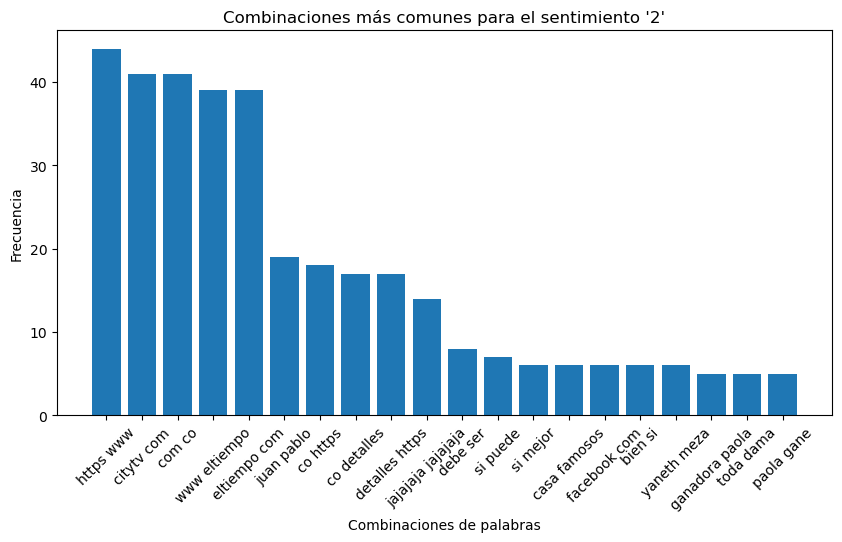

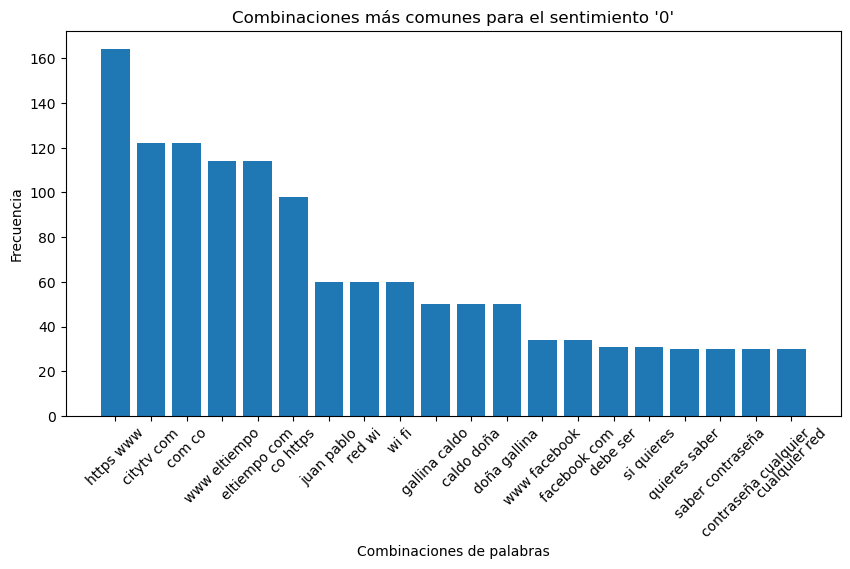

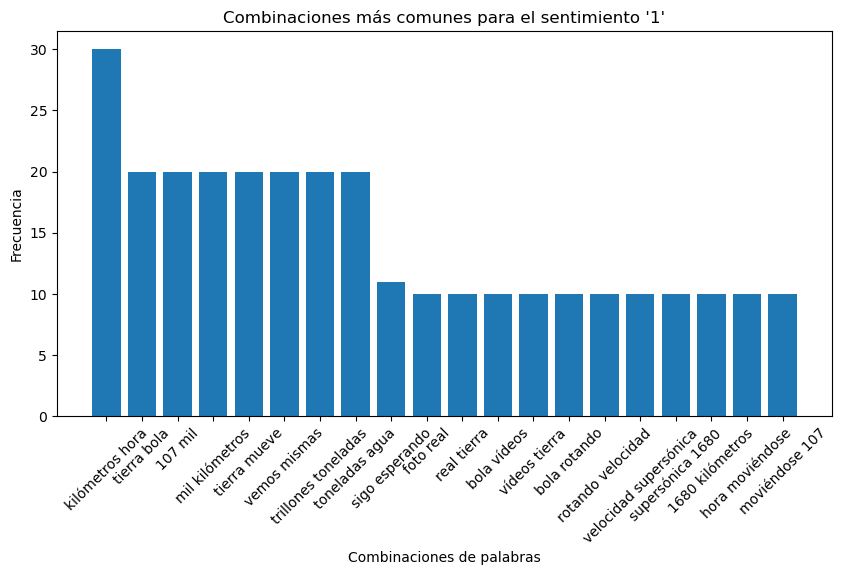

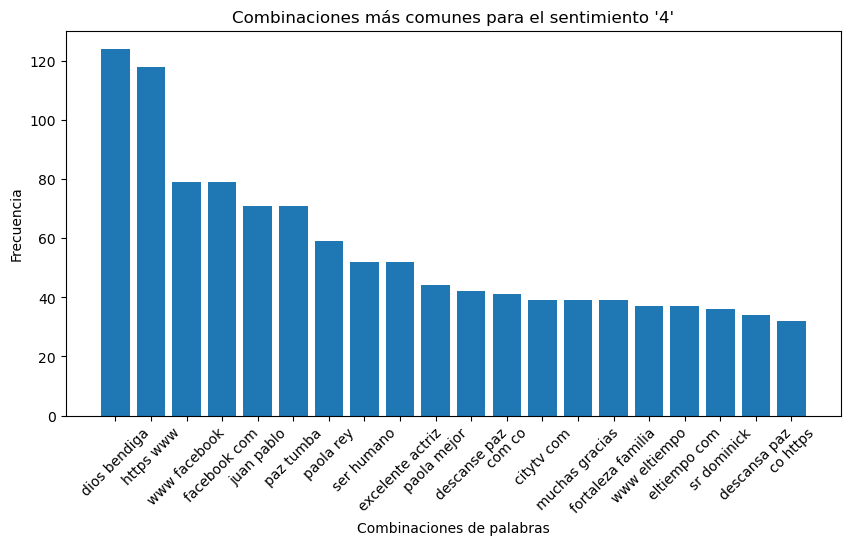

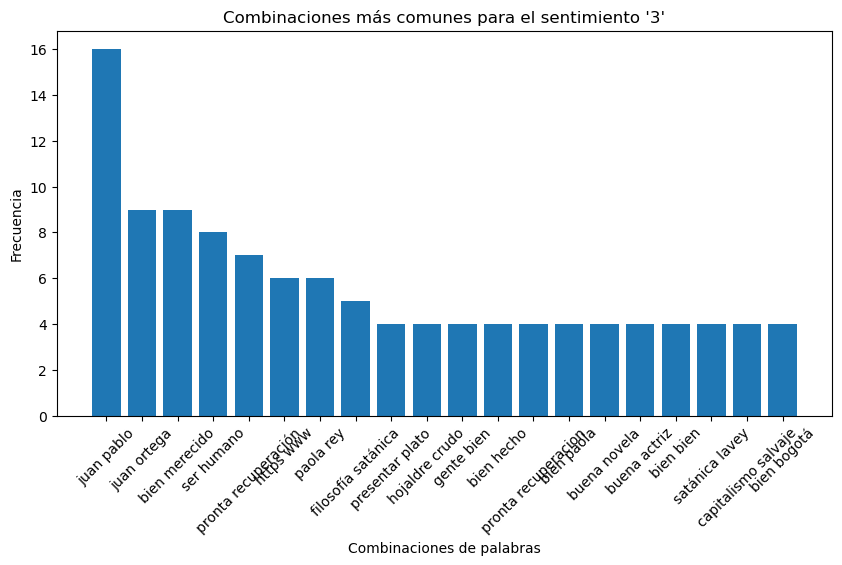

In [7]:
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer

# Función para obtener las combinaciones de palabras más frecuentes
def combinaciones_frecuentes_por_sentimiento(df, sentimiento, ngram_range=(2, 2), top_n=20):
    # Filtrar por sentimiento
    comentarios = df[df['sentimiento'] == sentimiento]['comentario']

    # Vectorizar los textos para extraer n-gramas
    vectorizer = CountVectorizer(ngram_range=ngram_range)
    X = vectorizer.fit_transform(comentarios)

    # Contar las combinaciones de palabras
    suma = X.sum(axis=0)
    frecuencias = [(palabra, suma[0, idx]) for palabra, idx in vectorizer.vocabulary_.items()]
    frecuencias = sorted(frecuencias, key=lambda x: x[1], reverse=True)

    # Retornar las combinaciones más comunes
    return frecuencias[:top_n]

# Obtener los sentimientos únicos
sentimientos_unicos = comentarios_clasificados['sentimiento'].unique()

# Imprimir las combinaciones más comunes para cada sentimiento
for sentimiento in sentimientos_unicos:
    print(f"\nCombinaciones más comunes para el sentimiento '{sentimiento}':")
    combinaciones_comunes = combinaciones_frecuentes_por_sentimiento(comentarios_clasificados, sentimiento)
    for combinacion, frecuencia in combinaciones_comunes:
        print(f"{combinacion}: {frecuencia}")

# Opcional: Visualización de las combinaciones más frecuentes para un sentimiento
for sentimiento in sentimientos_unicos:
    combinaciones_comunes = combinaciones_frecuentes_por_sentimiento(comentarios_clasificados, sentimiento)
    palabras, frecuencias = zip(*combinaciones_comunes)

    plt.figure(figsize=(10, 5))
    plt.bar(palabras, frecuencias)
    plt.title(f"Combinaciones más comunes para el sentimiento '{sentimiento}'")
    plt.xlabel("Combinaciones de palabras")
    plt.ylabel("Frecuencia")
    plt.xticks(rotation=45)
    plt.show()


In [15]:
print(comentarios_clasificados)

                                                  titulo  \
0      #Bravíssimo |\n Yeison Jiménez lanza hoy 'El T...   
1      #Bravíssimo |\n Yeison Jiménez lanza hoy 'El T...   
2      #Bravíssimo |\n Yeison Jiménez lanza hoy 'El T...   
3      #Bravíssimo |\n Yeison Jiménez lanza hoy 'El T...   
16     #LoMásVistoEnCity | \n El entrenador comentó q...   
...                                                  ...   
15842  #SuperLike | Igancio Baladán compartió algunos...   
15858  #SuperLike | Colleen Hoover, autora de 'Romper...   
15873  #SuperLike | Blessd sigue brillando con su mús...   
15889  #SuperLike | Cazzu ha vuelto a figurar en la e...   
15909  #SuperLike | El guardaespaldas de Jennifer Lóp...   

                            usuario                             comentario  \
0                     Sandra Barros              jajajaja jajajajaja serio   
1                     Diego Herrera           rompiendo oidos tipo géneros   
2                     James Howlett          

In [205]:
print(comentarios_no_clasificados)

Empty DataFrame
Columns: [titulo, usuario, comentario, genero, sentimiento]
Index: []


Reporte de Clasificación:
              precision    recall  f1-score   support

    Negativo       0.60      0.84      0.70       321
     Neutral       0.66      0.30      0.41       190
    Positivo       0.73      0.67      0.70       281

    accuracy                           0.65       792
   macro avg       0.66      0.60      0.60       792
weighted avg       0.66      0.65      0.63       792



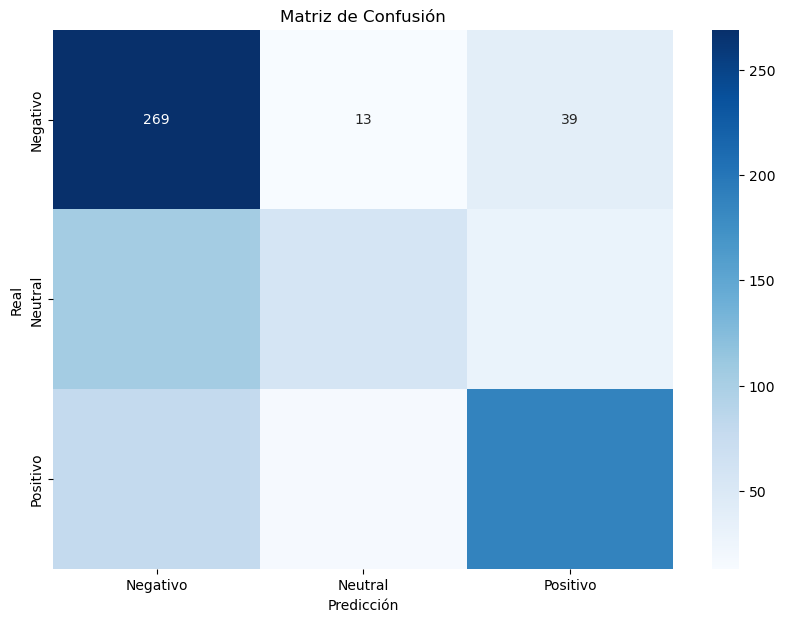

In [219]:
import nltk
from nltk.corpus import stopwords
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd


# Dividir los datos clasificados en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    comentarios_clasificados['comentario'],
    comentarios_clasificados['sentimiento'],
    test_size=0.2,
    random_state=47
)

# Convertir texto a representaciones numéricas usando TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)  # Limitar a las 7000 palabras más frecuentes
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Entrenar un modelo de Naive Bayes
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# Evaluar el modelo en el conjunto de prueba
y_pred = model.predict(X_test_tfidf)
print("Reporte de Clasificación:")
print(classification_report(y_test, y_pred))

# Crear y mostrar la matriz de confusión con todas las clases presentes
classes = sorted(y_test.unique())  # Obtener todas las clases únicas presentes en y_test
cm = confusion_matrix(y_test, y_pred, labels=classes)

plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=classes, yticklabels=classes, cmap='Blues')
plt.title("Matriz de Confusión")
plt.xlabel("Predicción")
plt.ylabel("Real")
plt.show()



In [209]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import LinearSVC

# Ajustar TF-IDF
vectorizer = TfidfVectorizer(max_features=8700, ngram_range=(1, 2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Probar un modelo SVM con búsqueda de hiperparámetros
param_grid = {'C': [0.4, 1, 14]}
svm_model = GridSearchCV(LinearSVC(), param_grid, cv=5, scoring='f1_macro')
svm_model.fit(X_train_tfidf, y_train)

# Evaluar el modelo
y_pred = svm_model.predict(X_test_tfidf)
print("Reporte de Clasificación con SVM:")
print(classification_report(y_test, y_pred))


Reporte de Clasificación con SVM:
              precision    recall  f1-score   support

    Negativo       0.72      0.71      0.72       321
     Neutral       0.57      0.67      0.62       190
    Positivo       0.76      0.68      0.72       281

    accuracy                           0.69       792
   macro avg       0.68      0.69      0.68       792
weighted avg       0.70      0.69      0.69       792



In [189]:
# Diccionario para mapear tanto cadenas como números
mapa_etiquetas = {
    0: "Negativo",
    1: "Neutral",
    2: "Positivo",
    "Negativo": "Negativo",
    "Neutral": "Neutral",
    "Positivo": "Positivo"
}

# Convertir etiquetas a cadenas de forma robusta
y_test = [mapa_etiquetas[label] for label in y_test]
y_pred = [mapa_etiquetas[label] for label in y_pred]


In [190]:
mapa_inverso = {"Negativo": 0, "Neutral": 1, "Positivo": 2}
y_test = [mapa_inverso[label] if isinstance(label, str) else label for label in y_test]
y_pred = [mapa_inverso[label] if isinstance(label, str) else label for label in y_pred]


In [191]:
print("Etiquetas únicas en y_test:", set(y_test))
print("Etiquetas únicas en y_pred:", set(y_pred))


Etiquetas únicas en y_test: {0, 1, 2}
Etiquetas únicas en y_pred: {0, 1, 2}


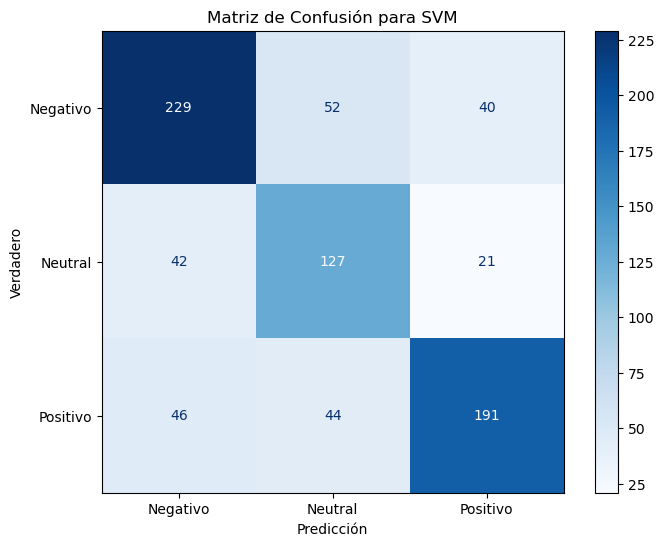

In [192]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Etiquetas de las clases
labels = ["Negativo", "Neutral", "Positivo"]

# Calcular la matriz de confusión
cm = confusion_matrix(y_test, y_pred, labels=[0, 1, 2])

# Visualizar la matriz de confusión
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax, cmap="Blues", colorbar=True)

# Añadir título y etiquetas
plt.title("Matriz de Confusión para SVM")
plt.xlabel("Predicción")
plt.ylabel("Verdadero")
plt.show()


In [198]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer

# Convertir etiquetas a formato one-hot encoding
encoder = LabelBinarizer()
y_train_encoded = encoder.fit_transform(y_train)
y_test_encoded = encoder.transform(y_test)

# Crear la arquitectura de la red neuronal
model = Sequential([
    Dense(64, input_dim=X_train_tfidf.shape[1], activation='relu'),  # Capa densa con 128 neuronas
    Dropout(0.4),  # Regularización para prevenir sobreajuste
    Dense(32, activation='relu'),  # Capa intermedia
    Dropout(0.4),
    Dense(3, activation='softmax')  # Capa de salida con 3 clases
])

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train_tfidf.toarray(), y_train_encoded,
                    epochs=10, batch_size=27,
                    validation_data=(X_test_tfidf.toarray(), y_test_encoded),
                    verbose=1)

# Evaluar el modelo en el conjunto de prueba
loss, accuracy = model.evaluate(X_test_tfidf.toarray(), y_test_encoded, verbose=0)
print(f"Precisión en el conjunto de prueba: {accuracy:.2f}")

# Predecir etiquetas
y_pred_nn = np.argmax(model.predict(X_test_tfidf.toarray()), axis=1)

# Calcular métricas
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_nn, target_names=encoder.classes_))


c:\Users\Yeider\anaconda3\Lib\site-packages\numpy\lib\arraysetops.py:612: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Epoch 1/10
118/118 [==============================] - 5s 26ms/step - loss: 1.0851 - accuracy: 0.4126 - val_loss: 0.0000e+00 - val_accuracy: 0.8182
Epoch 2/10
118/118 [==============================] - 3s 22ms/step - loss: 0.9491 - accuracy: 0.5912 - val_loss: 0.0000e+00 - val_accuracy: 0.6124
Epoch 3/10
118/118 [==============================] - 3s 24ms/step - loss: 0.6292 - accuracy: 0.7768 - val_loss: 0.0000e+00 - val_accuracy: 0.4444
Epoch 4/10
118/118 [==============================] - 3s 22ms/step - loss: 0.3924 - accuracy: 0.8699 - val_loss: 0.0000e+00 - val_accuracy: 0.3699
Epoch 5/10
118/118 [==============================] - 3s 23ms/step - loss: 0.2820 - accuracy: 0.9129 - val_loss: 0.0000e+00 - val_accuracy: 0.3699
Epoch 6/10
118/118 [==============================] - 2s 21ms/step - loss: 0.2145 - accuracy: 0.9337 - val_loss: 0.0000e+00 - val_accuracy: 0.3535
Epoch 7/10
118/118 [==============================] - 2s 20ms/step - loss: 0.1903 - accuracy: 0.9400 - val_loss: 0.000

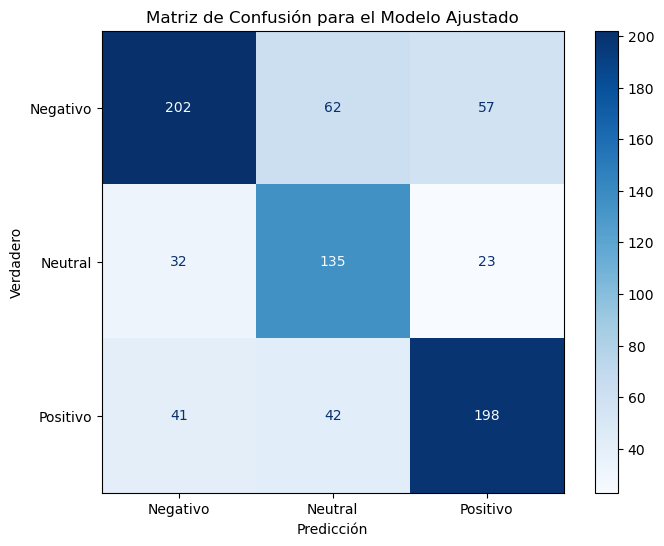

In [200]:
# Crear la matriz de confusión con los resultados del modelo ajustado
cm_adjusted = confusion_matrix(y_test, y_pred_nn, labels=[0, 1, 2])

# Visualizar la matriz de confusión ajustada
disp_adjusted = ConfusionMatrixDisplay(confusion_matrix=cm_adjusted, display_labels=["Negativo", "Neutral", "Positivo"])
fig, ax = plt.subplots(figsize=(8, 6))
disp_adjusted.plot(ax=ax, cmap="Blues", colorbar=True)

# Añadir título y etiquetas
plt.title("Matriz de Confusión para el Modelo Ajustado")
plt.xlabel("Predicción")
plt.ylabel("Verdadero")
plt.show()


BERT RED NEURONAL

In [201]:
# Importar librerías necesarias
import pandas as pd
import torch
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from transformers import BertTokenizer, BertForSequenceClassification
from transformers import AdamW

# Verificar si hay GPU disponible
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Usando dispositivo: {device}")

# Cargar datos procesados (utilizamos los datos clasificados del paso anterior)
X = comentarios_clasificados['comentario'].tolist()
y = comentarios_clasificados['sentimiento'].tolist()

# Mapeo de etiquetas a números
label_mapping = {"Negativo": 0, "Neutral": 1, "Positivo": 2}
y = [label_mapping[label] for label in y]

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenizador de BERT
tokenizer = BertTokenizer.from_pretrained("bert-base-multilingual-cased")

# Tokenizar y convertir los textos a tensores
def encode_data(texts, labels, tokenizer, max_length=128):
    inputs = tokenizer(
        texts,
        padding=True,
        truncation=True,
        max_length=max_length,
        return_tensors="pt"
    )
    labels = torch.tensor(labels)
    return inputs, labels

train_inputs, train_labels = encode_data(X_train, y_train, tokenizer)
test_inputs, test_labels = encode_data(X_test, y_test, tokenizer)

# Cargar el modelo preentrenado BERT para clasificación
model = BertForSequenceClassification.from_pretrained("bert-base-multilingual-cased", num_labels=3)
model.to(device)

# Definir optimizador y función de pérdida
optimizer = AdamW(model.parameters(), lr=5e-5)
loss_fn = torch.nn.CrossEntropyLoss()

# Crear un DataLoader para los datos
from torch.utils.data import DataLoader, TensorDataset

train_data = TensorDataset(train_inputs["input_ids"], train_inputs["attention_mask"], train_labels)
train_loader = DataLoader(train_data, batch_size=16, shuffle=True)

test_data = TensorDataset(test_inputs["input_ids"], test_inputs["attention_mask"], test_labels)
test_loader = DataLoader(test_data, batch_size=16, shuffle=False)

# Entrenamiento del modelo
epochs = 3
for epoch in range(epochs):
    model.train()
    total_loss = 0
    for batch in train_loader:
        input_ids, attention_mask, labels = [b.to(device) for b in batch]
        optimizer.zero_grad()
        outputs = model(input_ids=input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch + 1}/{epochs} - Pérdida: {total_loss / len(train_loader)}")

# Evaluación del modelo
model.eval()
all_preds = []
all_labels = []
with torch.no_grad():
    for batch in test_loader:
        input_ids, attention_mask, labels = [b.to(device) for b in batch]
        outputs = model(input_ids=input_ids, attention_mask=attention_mask)
        logits = outputs.logits
        preds = torch.argmax(logits, dim=1).cpu().numpy()
        all_preds.extend(preds)
        all_labels.extend(labels.cpu().numpy())

# Reporte de clasificación
print("Reporte de clasificación:\n", classification_report(all_labels, all_preds, target_names=label_mapping.keys()))


Usando dispositivo: cpu


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-cased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
c:\Users\Yeider\anaconda3\Lib\site-packages\transformers\optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/3 - Pérdida: 0.987579981184969
Epoch 2/3 - Pérdida: 0.7667001789868481
Epoch 3/3 - Pérdida: 0.669388201050084
Reporte de clasificación:
               precision    recall  f1-score   support

    Negativo       0.74      0.55      0.63       297
     Neutral       0.56      0.76      0.65       221
    Positivo       0.70      0.70      0.70       274

    accuracy                           0.66       792
   macro avg       0.67      0.67      0.66       792
weighted avg       0.68      0.66      0.66       792



In [221]:
# Tokenizar y convertir los textos de los comentarios no clasificados a tensores
no_clasificados_textos = comentarios_no_clasificados['comentario'].tolist()
no_clasificados_inputs = tokenizer(
    no_clasificados_textos,
    padding=True,
    truncation=True,
    max_length=128,
    return_tensors="pt"
).to(device)

# Pasar los datos por el modelo BERT para obtener predicciones
model.eval()
with torch.no_grad():
    outputs = model(
        input_ids=no_clasificados_inputs["input_ids"],
        attention_mask=no_clasificados_inputs["attention_mask"]
    )
    logits = outputs.logits
    preds = torch.argmax(logits, dim=1).cpu().numpy()

# Mapear las predicciones numéricas a etiquetas
inverse_label_mapping = {v: k for k, v in label_mapping.items()}
comentarios_no_clasificados['sentimiento'] = [inverse_label_mapping[pred] for pred in preds]

# Guardar los resultados en el archivo original
resultados_json = pd.concat([comentarios_clasificados, comentarios_no_clasificados], ignore_index=True)
resultados_json.to_json('DB_Completo_Clasificado_BERT.json', orient='records', force_ascii=False, indent=4)

print("Predicciones completadas con BERT. Archivo guardado como 'DB_Completo_Clasificado_BERT.json'.")


AttributeError: 'MultinomialNB' object has no attribute 'eval'